In [103]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
from scipy import signal
from scipy.misc import electrocardiogram
import os
from scipy.signal import find_peaks
import statistics
from numpy.polynomial import hermite
import matplotlib.ticker as mticker

In [2]:
def read_csv_file(filename):
    with open(filename) as csvfile:
        spamreader = csv.reader(csvfile)
        input_data = np.empty([1600])
        for num, row in enumerate(spamreader):
            
            if num > 19:
                index = num - 20
                input_data[index] = row[3]
        
        return input_data

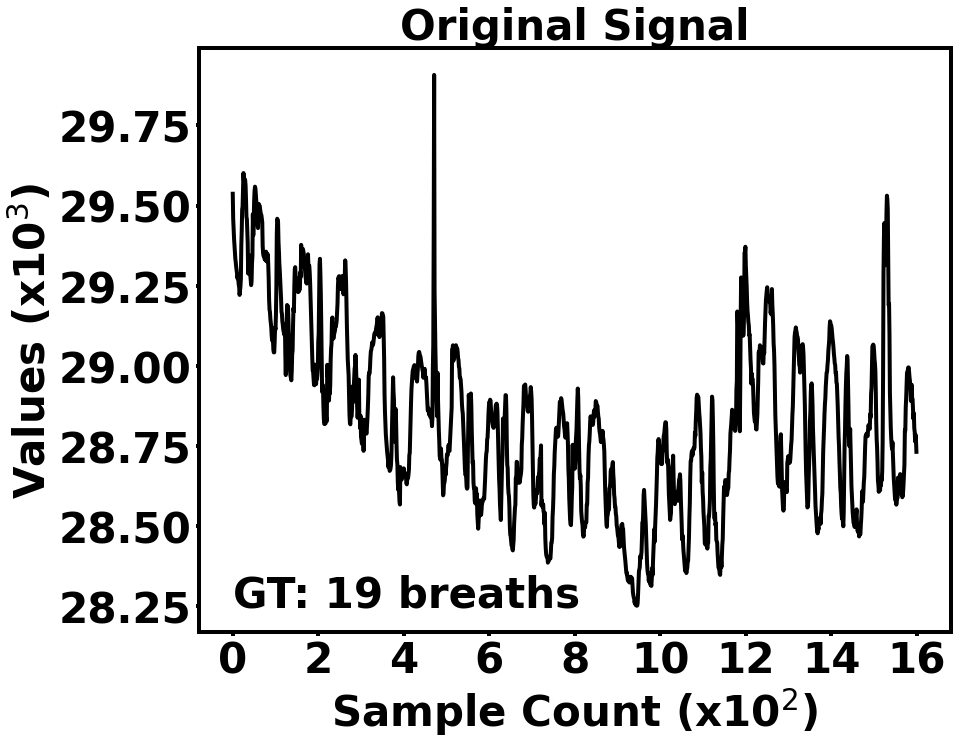

In [93]:
# Original Signal
cvs_path = './003/003-19.csv'
rsp_y_ori = read_csv_file(cvs_path)
sampleRate = 26

# Original image
rsp_x=np.arange(0, rsp_y_ori.size) / sampleRate
gt = int(cvs_path.split('-')[1].split('.')[0])

#===
label_format = '{:,.1f}'
rsp_x = np.arange(1600)/100
rsp_y_ori = rsp_y_ori/1000
# rsp_y = [label_format.format(x) for x in rsp_y_ori]


canvas = plt.figure(figsize=(12, 10))
rect = canvas.patch
rect.set_facecolor('white')
sp1 = canvas.add_subplot(1,1,1)

bwith = 4
sp1.plot(rsp_x, rsp_y_ori, lw=bwith, color='black')

sp1.tick_params(axis='x')
sp1.tick_params(axis='y')

sp1.set_xlabel('Sample Count (x10$^2$)', fontsize=42, fontweight="bold")
sp1.set_ylabel('Values (x10$^3$)', fontsize=42, fontweight="bold")
sp1.set_title('Original Signal', fontsize=42, fontweight="bold")

plt.tight_layout()
plt.xticks(fontsize=42, fontweight="bold")
plt.yticks(fontsize=42, fontweight="bold")

ax = plt.gca()
ax.spines['top'].set_linewidth(bwith)
ax.spines['left'].set_linewidth(bwith)
ax.spines['bottom'].set_linewidth(bwith)
ax.spines['right'].set_linewidth(bwith)

plt.rcParams["font.weight"] = "bold"
plt.tick_params(width=bwith)

# loc = (rsp_y_ori/10000).min()

plt.text(0, 28.25, 'GT: %d breaths'%gt, fontsize = 42)
plt.savefig('003-19_pro.png', bbox_inches = "tight")

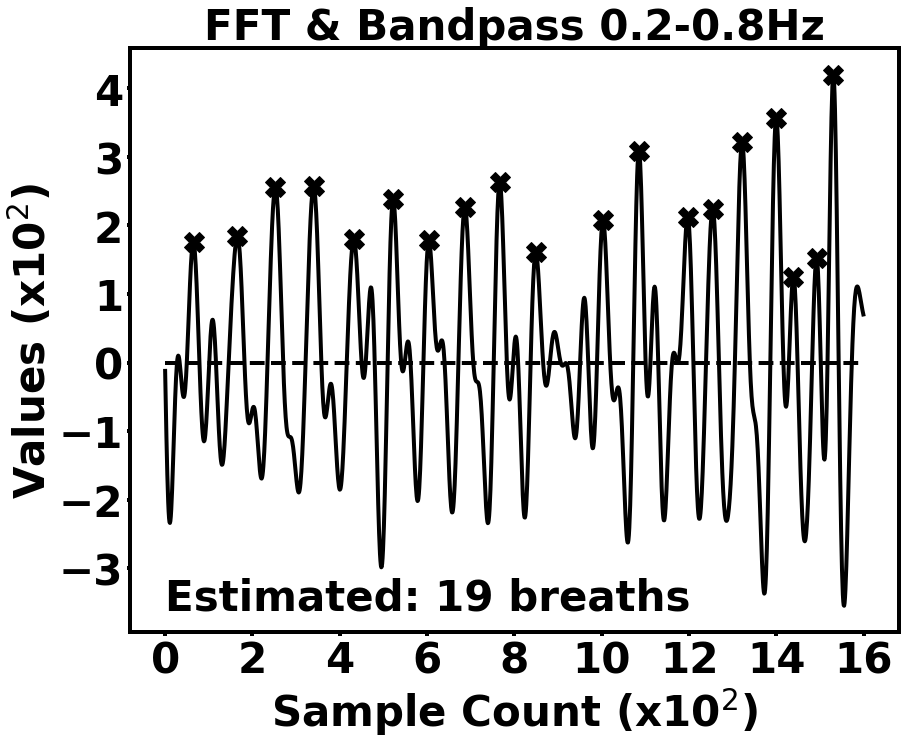

In [99]:
# FFT & Bandpass 0.2-0.8Hz & thresholds

cvs_path = './003/003-19.csv'
rsp_y_ori = read_csv_file(cvs_path)
sampleRate = 26
distance_thresh = 0.55
height_thresh = 0.65

# Original signal
rsp_x=np.arange(0, rsp_y_ori.size) / sampleRate
gt = int(cvs_path.split('-')[1].split('.')[0])

# BandPass - # Previous results
wn=2*0.2/sampleRate
b, a = signal.butter(8, wn, 'highpass')   
rsp_y = signal.filtfilt(b, a, rsp_y_ori)

wn=2*0.5/sampleRate
b, a = signal.butter(8, wn, 'lowpass') 
rsp_y = signal.filtfilt(b, a, rsp_y)
peaks, _ = find_peaks(rsp_y, height=35,distance=30)

# BandPass + threshold
wn=2*0.2/sampleRate
b, a = signal.butter(8, wn, 'highpass')  
rsp_y = signal.filtfilt(b, a, rsp_y_ori)

wn=2*0.8/sampleRate
b, a = signal.butter(8, wn, 'lowpass') 
rsp_y = signal.filtfilt(b, a, rsp_y)

peaks, _ = find_peaks(rsp_y, height=35,distance=30)

# Cal Height Threshold
height_peaks = rsp_y[peaks]
median = statistics.median(height_peaks)
height_thresh = int(height_thresh*median)

# Cal Distance Threshold
distance = []
for i in range(1, len(peaks)):
    distance.append(peaks[i] - peaks[i-1])
distance = np.array(distance)
median_distance = statistics.median(distance)
distance_thresh = int(distance_thresh*median_distance)

peaks, _ = find_peaks(rsp_y, height=height_thresh, distance=distance_thresh)


# rescale for output the img
rsp_y = rsp_y/100
rsp_x = np.arange(1600)/100
peaks_d  = peaks/100

canvas = plt.figure(figsize=(12, 10))
rect = canvas.patch
rect.set_facecolor('white')
sp1 = canvas.add_subplot(1,1,1)

bwith = 4
sp1.plot(rsp_x, rsp_y, lw=bwith, color='black')

sp1.tick_params(axis='x')
sp1.tick_params(axis='y')

sp1.set_xlabel('Sample Count (x10$^2$)', fontsize=42, fontweight="bold")
sp1.set_ylabel('Values (x10$^2$)', fontsize=42, fontweight="bold")
sp1.set_title('FFT & Bandpass 0.2-0.8Hz', fontsize=42, fontweight="bold")

plt.tight_layout()
plt.xticks(fontsize=42, fontweight="bold")
plt.yticks(fontsize=42, fontweight="bold")

ax = plt.gca()
ax.spines['top'].set_linewidth(bwith)
ax.spines['left'].set_linewidth(bwith)
ax.spines['bottom'].set_linewidth(bwith)
ax.spines['right'].set_linewidth(bwith)

# plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
plt.rcParams["font.weight"] = "bold"
plt.tick_params(width=bwith)

loc = (rsp_y/1000).min()
plt.text(0, -3.6, 'Estimated: %d breaths' %len(peaks), fontsize = 42)
plt.plot(peaks_d, rsp_y[peaks], "X", markersize=20, lw=6, color='black')
plt.plot(np.zeros((17,)), "--", color="black", lw=bwith)
plt.savefig('003-19_result.png', bbox_inches = "tight")

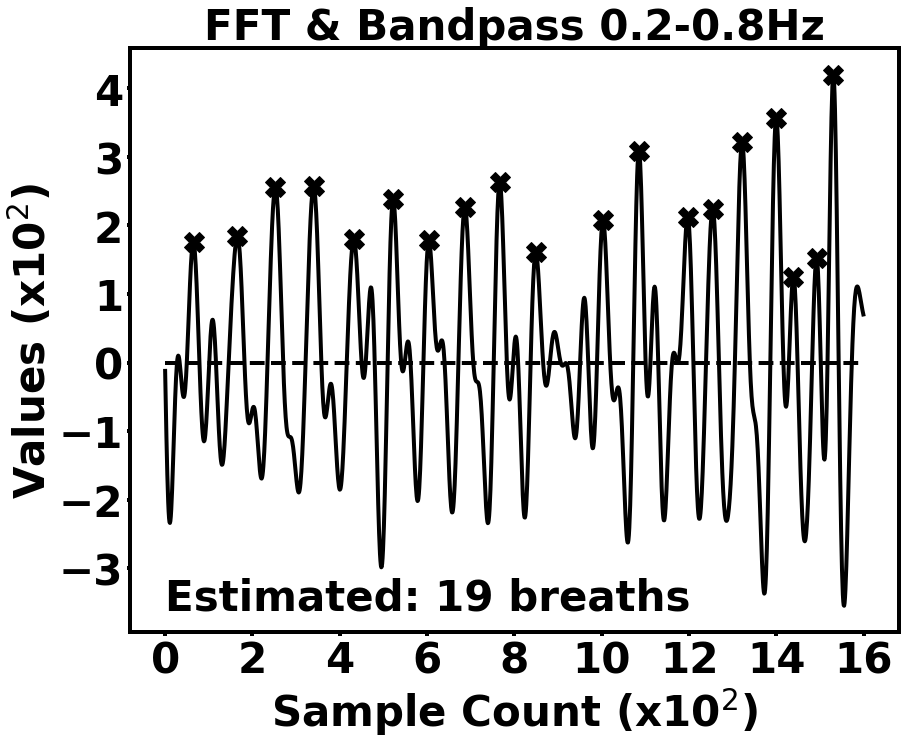

In [98]:
# FFT & Bandpass 0.2-0.8Hz & thresholds

cvs_path = './003/003-19.csv'
rsp_y_ori = read_csv_file(cvs_path)
sampleRate = 26
distance_thresh = 0.55
height_thresh = 0.65

# Original signal
rsp_x=np.arange(0, rsp_y_ori.size) / sampleRate
gt = int(cvs_path.split('-')[1].split('.')[0])

# BandPass - # Previous results
wn=2*0.2/sampleRate
b, a = signal.butter(8, wn, 'highpass')   
rsp_y = signal.filtfilt(b, a, rsp_y_ori)

wn=2*0.5/sampleRate
b, a = signal.butter(8, wn, 'lowpass') 
rsp_y = signal.filtfilt(b, a, rsp_y)
peaks, _ = find_peaks(rsp_y, height=35,distance=30)

# BandPass + threshold
wn=2*0.2/sampleRate
b, a = signal.butter(8, wn, 'highpass')  
rsp_y = signal.filtfilt(b, a, rsp_y_ori)

wn=2*0.8/sampleRate
b, a = signal.butter(8, wn, 'lowpass') 
rsp_y = signal.filtfilt(b, a, rsp_y)

peaks, _ = find_peaks(rsp_y, height=35,distance=30)

# Cal Height Threshold
height_peaks = rsp_y[peaks]
median = statistics.median(height_peaks)
height_thresh = int(height_thresh*median)

# Cal Distance Threshold
distance = []
for i in range(1, len(peaks)):
    distance.append(peaks[i] - peaks[i-1])
distance = np.array(distance)
median_distance = statistics.median(distance)
distance_thresh = int(distance_thresh*median_distance)

peaks, _ = find_peaks(rsp_y, height=height_thresh, distance=distance_thresh)


# rescale for output the img
rsp_y = rsp_y/100
rsp_x = np.arange(1600)/100
peaks_d  = peaks/100

canvas = plt.figure(figsize=(12, 10))
rect = canvas.patch
rect.set_facecolor('white')
sp1 = canvas.add_subplot(1,1,1)

bwith = 4
sp1.plot(rsp_x, rsp_y, lw=bwith, color='black')

sp1.tick_params(axis='x')
sp1.tick_params(axis='y')

sp1.set_xlabel('Sample Count (x10$^2$)', fontsize=42, fontweight="bold")
sp1.set_ylabel('Values (x10$^2$)', fontsize=42, fontweight="bold")
sp1.set_title('FFT & Bandpass 0.2-0.8Hz', fontsize=42, fontweight="bold")

plt.tight_layout()
plt.xticks(fontsize=42, fontweight="bold")
plt.yticks(fontsize=42, fontweight="bold")

ax = plt.gca()
ax.spines['top'].set_linewidth(bwith)
ax.spines['left'].set_linewidth(bwith)
ax.spines['bottom'].set_linewidth(bwith)
ax.spines['right'].set_linewidth(bwith)

# plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
plt.rcParams["font.weight"] = "bold"
plt.tick_params(width=bwith)

loc = (rsp_y/1000).min()
plt.text(0, -3.6, 'Estimated: %d breaths' %len(peaks), fontsize = 42)
plt.plot(peaks_d, rsp_y[peaks], "X", markersize=20, lw=6, color='black')
plt.plot(np.zeros((17,)), "--", color="black", lw=bwith)
plt.savefig('003-19_result.png', bbox_inches = "tight")

C:\Users\jyuan\AppData\Local\Temp\ipykernel_694152\2766811489.py:80: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_yticklabels([label_format.format(x) for x in ytick_label], fontsize=42, fontweight="bold")
C:\Users\jyuan\AppData\Local\Temp\ipykernel_694152\2766811489.py:97: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_yticklabels([label_format_0f.format(x) for x in ytick_label], fontsize=42, fontweight="bold")


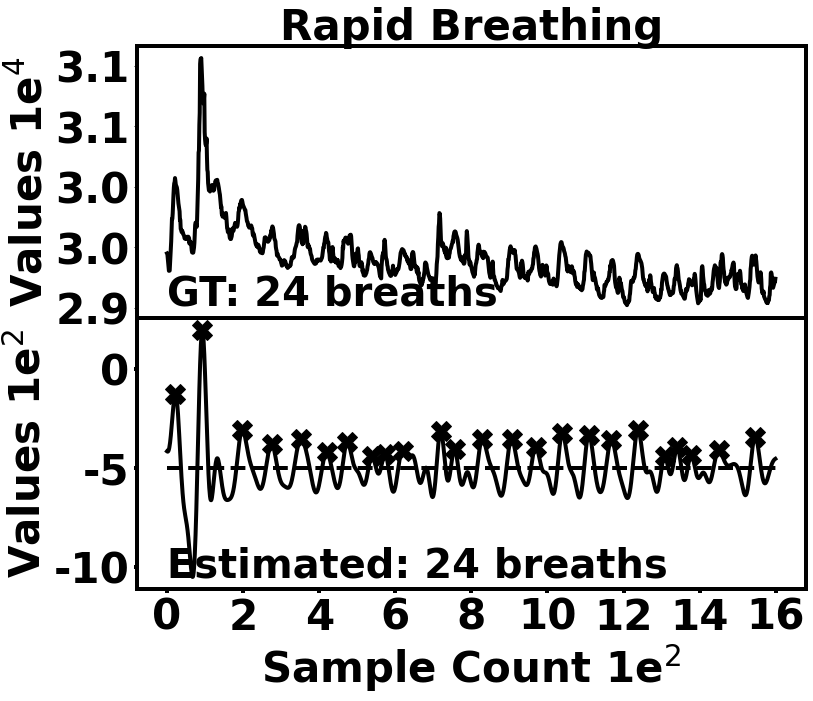

In [169]:
cvs_path = './003/005-24.csv'
rsp_y_ori = read_csv_file(cvs_path)
sampleRate = 26
distance_thresh = 0.45
height_thresh = 0.45

# Original signal
rsp_x=np.arange(0, rsp_y_ori.size) / sampleRate
gt = int(cvs_path.split('-')[1].split('.')[0])

# BandPass - # Previous results
wn=2*0.2/sampleRate
b, a = signal.butter(8, wn, 'highpass')   
rsp_y = signal.filtfilt(b, a, rsp_y_ori)

wn=2*0.5/sampleRate
b, a = signal.butter(8, wn, 'lowpass') 
rsp_y = signal.filtfilt(b, a, rsp_y)
peaks, _ = find_peaks(rsp_y, height=35,distance=30)

# BandPass + threshold
wn=2*0.2/sampleRate
b, a = signal.butter(8, wn, 'highpass')  
rsp_y = signal.filtfilt(b, a, rsp_y_ori)

wn=2*0.8/sampleRate
b, a = signal.butter(8, wn, 'lowpass') 
rsp_y = signal.filtfilt(b, a, rsp_y)

peaks, _ = find_peaks(rsp_y, height=35,distance=30)

# Cal Height Threshold
height_peaks = rsp_y[peaks]
median = statistics.median(height_peaks)
height_thresh = int(height_thresh*median)

# Cal Distance Threshold
distance = []
for i in range(1, len(peaks)):
    distance.append(peaks[i] - peaks[i-1])
distance = np.array(distance)
median_distance = statistics.median(distance)
distance_thresh = int(distance_thresh*median_distance)

peaks, _ = find_peaks(rsp_y, height=height_thresh, distance=distance_thresh)




# rescale for output the img
rsp_y_ori = rsp_y_ori/10000
rsp_y = rsp_y/100
rsp_x = np.arange(1600)/100
peaks_d  = peaks/100
bwith = 4
label_format = '{:,.1f}'
label_format_0f = '{:,.0f}'

fig = plt.figure(figsize=(12, 10))
gs = fig.add_gridspec(2, hspace=0)
axs = gs.subplots(sharex=True)
# fig.suptitle('Normal Breathing',fontsize=42, fontweight="bold")


# Title
axs[0].set_title('Rapid Breathing', fontsize=42, fontweight="bold")

axs[0].plot(rsp_x, rsp_y_ori, lw=bwith, color='black')
axs[0].tick_params(axis='x')
axs[0].tick_params(axis='y')

axs[0].set_ylabel('Values 1e$^4$', fontsize=42, fontweight="bold")
axs[0].spines['top'].set_linewidth(bwith)
axs[0].spines['left'].set_linewidth(bwith)
axs[0].spines['right'].set_linewidth(bwith)

ytick_label = axs[0].get_yticks().tolist()
locator = mticker.MultipleLocator(base=0.1)
axs[0].yaxis.set_major_locator(locator)
axs[0].set_yticklabels([label_format.format(x) for x in ytick_label], fontsize=42, fontweight="bold")
loc = rsp_y_ori.min()
axs[0].text(0, loc, 'GT: %d breaths'%gt, fontsize = 40)


#== Second fig
axs[1].plot(rsp_x, rsp_y, lw=bwith, color='black')
axs[1].spines['top'].set_linewidth(bwith)
axs[1].spines['left'].set_linewidth(bwith)
axs[1].spines['bottom'].set_linewidth(bwith)
axs[1].spines['right'].set_linewidth(bwith)
plt.tick_params(width=bwith)
plt.xticks(fontsize=42, fontweight="bold")

ytick_label = axs[1].get_yticks().tolist()
locator = mticker.MultipleLocator(base=10)
axs[1].yaxis.set_major_locator(locator)
axs[1].set_yticklabels([label_format_0f.format(x) for x in ytick_label], fontsize=42, fontweight="bold")

axs[1].set_xlabel('Sample Count 1e$^2$', fontsize=42, fontweight="bold")
axs[1].set_ylabel('Values 1e$^2$', fontsize=42, fontweight="bold")
axs[1].plot(np.zeros((17,)), "--", color="black", lw=bwith)
axs[1].plot(peaks_d, rsp_y[peaks], "X", markersize=20, lw=6, color='black')
loc = rsp_y.min()
axs[1].text(0, loc, 'Estimated: %d breaths' %len(peaks), fontsize = 40)

plt.savefig('001-15_result.png', bbox_inches = "tight")
